In [1]:
import pandas as pd
from translation import translate_dataframe
from project.config import api_key
file_path = 'data/number of active business entities.csv'
data = pd.read_csv(file_path, delimiter=';', skiprows=5)

In [2]:
# Set the first meaningful row as the header and drop redundant rows
data.columns = data.iloc[0]  # Set the first row as the header
data = data[1:]  # Drop the header row from the data
data = data.reset_index(drop=True)  # Reset the index

# Drop columns with entirely NaN values or redundant information
data = data.dropna(axis=1, how='all')

# Display the DataFrame
print("DataFrame:")
data

DataFrame:


,NaN,NaN,NaN,"усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units",...,"усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits",NaN,NaN
0,Усього,NaN,Україна,1932161,1591160,1974318,1630878,1865530,1559161,1805059,...,1973577,1599755,1956248,1585414,1732508,1470584,1913193,1605341,Ukraine,Total
1,NaN,NaN,Вінницька область,77314,67983,80982,71540,75005,66360,68931,...,69980,60118,68102,58052,65869,57835,73106,63844,Vinnytsya,NaN
2,NaN,NaN,Волинська область,48168,42652,49273,43673,47063,42022,42157,...,41711,35664,41089,34809,40601,35399,45974,39999,Volyn,NaN
3,NaN,NaN,Дніпропетровська область,149741,123513,158775,131524,151425,125841,142141,...,153229,122402,153260,122749,143055,118499,160478,132750,Dnipropetrovsk,NaN
4,NaN,NaN,Донецька область,81537,70171,69350,57587,63694,53211,60894,...,65341,55868,61751,52549,29846,26878,28845,25571,Donetsk,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25195,1. Дані наведено без урахування результатів ді...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25196,2. Тире (–) – явищ не було.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25197,Notes.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25198,\n1. Data exclude on banks and budget organiza...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filter rows that contain "Ukraine" in any column
data_filtered = data[data.apply(lambda row: row.astype(str).str.contains("Ukraine").any(), axis=1)]

# Reset the index after filtering
data_filtered = data_filtered.reset_index(drop=True)

# Display the filtered DataFrame
data_filtered



,NaN,NaN,NaN,"усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units",...,"усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits","усього, одиниць/\ntotal, units","з них \nфізичних осіб-підприємців, одиниць/ including\nindividual entrepreneurs, \nunits",NaN,NaN
0,Усього,NaN,Україна,1932161,1591160,1974318,1630878,1865530,1559161,1805059,...,1973577,1599755,1956248,1585414,1732508,1470584,1913193,1605341,Ukraine,Total
1,"Сільське, лісове та рибне господарство",A,Україна,75660,29648,79284,32540,74620,29622,76593,...,73368,23916,70803,23050,53281,20437,62960,22071,Ukraine,"Agriculture, forestry and fishing"
2,"сільське господарство, мисливство та надання п...",01,Україна,67967,23787,70721,25824,66837,23478,69536,...,67121,19369,64960,18890,48378,16638,57768,18140,Ukraine,"crop and animal production, hunting and relate..."
3,вирощування однорічних і дворічних культур,01.1,Україна,50598,12486,53032,14176,50293,12294,54324,...,53203,11581,51683,11674,37693,10191,45695,11120,Ukraine,growing of non-perennial crops
4,"вирощування зернових культур (крім рису), бобо...",01.11,Україна,47148,10145,47690,9927,46398,9421,50788,...,50743,10212,49403,10453,36040,9156,43785,9989,Ukraine,"growing of cereals (except rice), leguminous c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,прання та хімічне чищення текстильних і хутрян...,96.01,Україна,1347,1104,1375,1136,1274,1074,1232,...,1333,1105,1325,1110,1145,994,1185,1022,Ukraine,washing and (dry-)cleaning of textile and fur ...
965,надання послуг перукарнями та салонами краси,96.02,Україна,40334,39305,40188,39209,39978,39178,57778,...,75669,74951,72684,72001,62444,62069,71467,71054,Ukraine,hairdressing and other beauty treatment
966,організування поховань і надання суміжних послуг,96.03,Україна,2673,2416,2596,2350,2406,2200,2341,...,2300,2083,2234,2026,1939,1790,2044,1878,Ukraine,funeral and related activities
967,діяльність із забезпечення фізичного комфорту,96.04,Україна,2916,2705,2887,2676,2758,2589,2690,...,3734,3509,3676,3464,3118,3011,3930,3802,Ukraine,physical well-being activities


In [4]:
# df_sample = data_filtered.head(3)
# data_translated = translate_dataframe(df_sample,api_key)
# data_translated

In [5]:
columns = list(data_filtered.columns) 
columns[0] = 'Category'   
columns[1] = "ID"
columns[2] = 'Region'
cleaned_columns = []
for col in columns:
    if type(col) == float:
        cleaned_columns.append(col)
        continue
    if '/' in col:
        cleaned_columns.append(col.split('/')[0])  
    else:
        cleaned_columns.append(col)
print(cleaned_columns)
data_filtered.columns = cleaned_columns

data_filtered


['Category', 'ID', 'Region', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', 'усього, одиниць', 'з них \nфізичних осіб-підприємців, одиниць', nan, nan]


,Category,ID,Region,"усього, одиниць","з них \nфізичних осіб-підприємців, одиниць","усього, одиниць","з них \nфізичних осіб-підприємців, одиниць","усього, одиниць","з них \nфізичних осіб-підприємців, одиниць","усього, одиниць",...,"усього, одиниць","з них \nфізичних осіб-підприємців, одиниць","усього, одиниць","з них \nфізичних осіб-підприємців, одиниць","усього, одиниць","з них \nфізичних осіб-підприємців, одиниць","усього, одиниць","з них \nфізичних осіб-підприємців, одиниць",NaN,NaN
0,Усього,NaN,Україна,1932161,1591160,1974318,1630878,1865530,1559161,1805059,...,1973577,1599755,1956248,1585414,1732508,1470584,1913193,1605341,Ukraine,Total
1,"Сільське, лісове та рибне господарство",A,Україна,75660,29648,79284,32540,74620,29622,76593,...,73368,23916,70803,23050,53281,20437,62960,22071,Ukraine,"Agriculture, forestry and fishing"
2,"сільське господарство, мисливство та надання п...",01,Україна,67967,23787,70721,25824,66837,23478,69536,...,67121,19369,64960,18890,48378,16638,57768,18140,Ukraine,"crop and animal production, hunting and relate..."
3,вирощування однорічних і дворічних культур,01.1,Україна,50598,12486,53032,14176,50293,12294,54324,...,53203,11581,51683,11674,37693,10191,45695,11120,Ukraine,growing of non-perennial crops
4,"вирощування зернових культур (крім рису), бобо...",01.11,Україна,47148,10145,47690,9927,46398,9421,50788,...,50743,10212,49403,10453,36040,9156,43785,9989,Ukraine,"growing of cereals (except rice), leguminous c..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,прання та хімічне чищення текстильних і хутрян...,96.01,Україна,1347,1104,1375,1136,1274,1074,1232,...,1333,1105,1325,1110,1145,994,1185,1022,Ukraine,washing and (dry-)cleaning of textile and fur ...
965,надання послуг перукарнями та салонами краси,96.02,Україна,40334,39305,40188,39209,39978,39178,57778,...,75669,74951,72684,72001,62444,62069,71467,71054,Ukraine,hairdressing and other beauty treatment
966,організування поховань і надання суміжних послуг,96.03,Україна,2673,2416,2596,2350,2406,2200,2341,...,2300,2083,2234,2026,1939,1790,2044,1878,Ukraine,funeral and related activities
967,діяльність із забезпечення фізичного комфорту,96.04,Україна,2916,2705,2887,2676,2758,2589,2690,...,3734,3509,3676,3464,3118,3011,3930,3802,Ukraine,physical well-being activities


In [6]:
data_filtered.drop(columns=['ID'], inplace=True)
data_filtered.drop(columns=[data_filtered.columns[22]], inplace=True)
data_filtered.drop(columns=[data_filtered.columns[3]], inplace=True)


In [7]:
data_filtered

,Category,Region,"усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць","усього, одиниць"
0,Усього,Україна,1932161,1974318,1865530,1805059,1839593,1941625,1973577,1956248,1732508,1913193
1,"Сільське, лісове та рибне господарство",Україна,75660,79284,74620,76593,76328,75450,73368,70803,53281,62960
2,"сільське господарство, мисливство та надання п...",Україна,67967,70721,66837,69536,69596,68675,67121,64960,48378,57768
3,вирощування однорічних і дворічних культур,Україна,50598,53032,50293,54324,54812,54019,53203,51683,37693,45695
4,"вирощування зернових культур (крім рису), бобо...",Україна,47148,47690,46398,50788,51496,51198,50743,49403,36040,43785
...,...,...,...,...,...,...,...,...,...,...,...,...
964,прання та хімічне чищення текстильних і хутрян...,Україна,1347,1375,1274,1232,1277,1354,1333,1325,1145,1185
965,надання послуг перукарнями та салонами краси,Україна,40334,40188,39978,57778,67745,72544,75669,72684,62444,71467
966,організування поховань і надання суміжних послуг,Україна,2673,2596,2406,2341,2325,2336,2300,2234,1939,2044
967,діяльність із забезпечення фізичного комфорту,Україна,2916,2887,2758,2690,2961,3398,3734,3676,3118,3930


In [8]:
columns = list(data_filtered.columns) 
print(columns)
year = 2014

col_w_y = []
for col in columns:
    if col != "Category" and col != "Region":
        col = f"{col} {year}"
        col_w_y.append(col)
        year += 1
    else:
        col_w_y.append(col)
data_filtered.columns = col_w_y
print(col_w_y)

['Category', 'Region', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць', 'усього, одиниць']
['Category', 'Region', 'усього, одиниць 2014', 'усього, одиниць 2015', 'усього, одиниць 2016', 'усього, одиниць 2017', 'усього, одиниць 2018', 'усього, одиниць 2019', 'усього, одиниць 2020', 'усього, одиниць 2021', 'усього, одиниць 2022', 'усього, одиниць 2023']


In [9]:
data_filtered

,Category,Region,"усього, одиниць 2014","усього, одиниць 2015","усього, одиниць 2016","усього, одиниць 2017","усього, одиниць 2018","усього, одиниць 2019","усього, одиниць 2020","усього, одиниць 2021","усього, одиниць 2022","усього, одиниць 2023"
0,Усього,Україна,1932161,1974318,1865530,1805059,1839593,1941625,1973577,1956248,1732508,1913193
1,"Сільське, лісове та рибне господарство",Україна,75660,79284,74620,76593,76328,75450,73368,70803,53281,62960
2,"сільське господарство, мисливство та надання п...",Україна,67967,70721,66837,69536,69596,68675,67121,64960,48378,57768
3,вирощування однорічних і дворічних культур,Україна,50598,53032,50293,54324,54812,54019,53203,51683,37693,45695
4,"вирощування зернових культур (крім рису), бобо...",Україна,47148,47690,46398,50788,51496,51198,50743,49403,36040,43785
...,...,...,...,...,...,...,...,...,...,...,...,...
964,прання та хімічне чищення текстильних і хутрян...,Україна,1347,1375,1274,1232,1277,1354,1333,1325,1145,1185
965,надання послуг перукарнями та салонами краси,Україна,40334,40188,39978,57778,67745,72544,75669,72684,62444,71467
966,організування поховань і надання суміжних послуг,Україна,2673,2596,2406,2341,2325,2336,2300,2234,1939,2044
967,діяльність із забезпечення фізичного комфорту,Україна,2916,2887,2758,2690,2961,3398,3734,3676,3118,3930


In [10]:
for col in data_filtered.columns:
    if col != "Category" and col != "Region":
        data_filtered[col] = pd.to_numeric(data_filtered[col], errors='coerce')
        
data_filtered

,Category,Region,"усього, одиниць 2014","усього, одиниць 2015","усього, одиниць 2016","усього, одиниць 2017","усього, одиниць 2018","усього, одиниць 2019","усього, одиниць 2020","усього, одиниць 2021","усього, одиниць 2022","усього, одиниць 2023"
0,Усього,Україна,1932161.0,1974318.0,1865530.0,1805059.0,1839593.0,1941625.0,1973577.0,1956248.0,1732508.0,1913193.0
1,"Сільське, лісове та рибне господарство",Україна,75660.0,79284.0,74620.0,76593.0,76328.0,75450.0,73368.0,70803.0,53281.0,62960.0
2,"сільське господарство, мисливство та надання п...",Україна,67967.0,70721.0,66837.0,69536.0,69596.0,68675.0,67121.0,64960.0,48378.0,57768.0
3,вирощування однорічних і дворічних культур,Україна,50598.0,53032.0,50293.0,54324.0,54812.0,54019.0,53203.0,51683.0,37693.0,45695.0
4,"вирощування зернових культур (крім рису), бобо...",Україна,47148.0,47690.0,46398.0,50788.0,51496.0,51198.0,50743.0,49403.0,36040.0,43785.0
...,...,...,...,...,...,...,...,...,...,...,...,...
964,прання та хімічне чищення текстильних і хутрян...,Україна,1347.0,1375.0,1274.0,1232.0,1277.0,1354.0,1333.0,1325.0,1145.0,1185.0
965,надання послуг перукарнями та салонами краси,Україна,40334.0,40188.0,39978.0,57778.0,67745.0,72544.0,75669.0,72684.0,62444.0,71467.0
966,організування поховань і надання суміжних послуг,Україна,2673.0,2596.0,2406.0,2341.0,2325.0,2336.0,2300.0,2234.0,1939.0,2044.0
967,діяльність із забезпечення фізичного комфорту,Україна,2916.0,2887.0,2758.0,2690.0,2961.0,3398.0,3734.0,3676.0,3118.0,3930.0


In [11]:
sorted_data = data_filtered.sort_values(by=data_filtered.columns[-1], ascending=False).head(10)
sorted_data

,Category,Region,"усього, одиниць 2014","усього, одиниць 2015","усього, одиниць 2016","усього, одиниць 2017","усього, одиниць 2018","усього, одиниць 2019","усього, одиниць 2020","усього, одиниць 2021","усього, одиниць 2022","усього, одиниць 2023"
0,Усього,Україна,1932161.0,1974318.0,1865530.0,1805059.0,1839593.0,1941625.0,1973577.0,1956248.0,1732508.0,1913193.0
515,Оптова та роздрібна торгівля; ремонт автотранс...,Україна,988694.0,989064.0,910413.0,837797.0,818217.0,834159.0,826129.0,777419.0,661158.0,714544.0
584,"роздрібна торгівля, крім торгівлі автотранспор...",Україна,745206.0,736287.0,674551.0,609974.0,588379.0,591829.0,593264.0,557446.0,474454.0,503726.0
693,Інформація та телекомунікації,Україна,114355.0,116136.0,129704.0,146909.0,174622.0,206147.0,234188.0,284141.0,295912.0,306822.0
726,"комп'ютерне програмування, консультування та п...",Україна,78249.0,79657.0,91782.0,106541.0,129066.0,153746.0,176322.0,217446.0,229022.0,230252.0
727,"комп'ютерне програмування, консультування та п...",Україна,78249.0,79657.0,91782.0,106541.0,129066.0,153746.0,176322.0,217446.0,229022.0,230252.0
728,комп'ютерне програмування,Україна,54072.0,55015.0,66308.0,79430.0,99352.0,120313.0,139452.0,174570.0,184658.0,184259.0
585,роздрібна торгівля в неспеціалізованих магазинах,Україна,243700.0,234900.0,214381.0,200086.0,199090.0,203722.0,207180.0,198549.0,163887.0,172059.0
780,"Професійна, наукова та технічна діяльність",Україна,115123.0,131035.0,125133.0,121546.0,126100.0,134800.0,140374.0,143210.0,137409.0,160419.0
527,"оптова торгівля, крім торгівлі автотранспортни...",Україна,182849.0,192990.0,178878.0,172829.0,173731.0,184043.0,173906.0,163035.0,136716.0,155989.0


In [12]:
data_translated = translate_dataframe(sorted_data,api_key)
data_translated

,Category,Region,"total, units 2014","total, units 2015","total, units 2016","total, units 2017","total, units 2018","total, units 2019","total, units 2020","total, units 2021","total, units 2022","total, units 2023"
0,Total,Ukraine,1932161.0,1974318.0,1865530.0,1805059.0,1839593.0,1941625.0,1973577.0,1956248.0,1732508.0,1913193.0
515,Wholesale and retail trade; repair of motor ve...,Ukraine,988694.0,989064.0,910413.0,837797.0,818217.0,834159.0,826129.0,777419.0,661158.0,714544.0
584,"retail trade, except of motor vehicles and mot...",Ukraine,745206.0,736287.0,674551.0,609974.0,588379.0,591829.0,593264.0,557446.0,474454.0,503726.0
693,Information and telecommunications,Ukraine,114355.0,116136.0,129704.0,146909.0,174622.0,206147.0,234188.0,284141.0,295912.0,306822.0
726,"computer programming, consulting and related a...",Ukraine,78249.0,79657.0,91782.0,106541.0,129066.0,153746.0,176322.0,217446.0,229022.0,230252.0
727,"computer programming, consulting and related a...",Ukraine,78249.0,79657.0,91782.0,106541.0,129066.0,153746.0,176322.0,217446.0,229022.0,230252.0
728,computer programming,Ukraine,54072.0,55015.0,66308.0,79430.0,99352.0,120313.0,139452.0,174570.0,184658.0,184259.0
585,retail sale in non-specialized stores,Ukraine,243700.0,234900.0,214381.0,200086.0,199090.0,203722.0,207180.0,198549.0,163887.0,172059.0
780,"Professional, scientific and technical activities",Ukraine,115123.0,131035.0,125133.0,121546.0,126100.0,134800.0,140374.0,143210.0,137409.0,160419.0
527,"wholesale trade, except of motor vehicles and ...",Ukraine,182849.0,192990.0,178878.0,172829.0,173731.0,184043.0,173906.0,163035.0,136716.0,155989.0


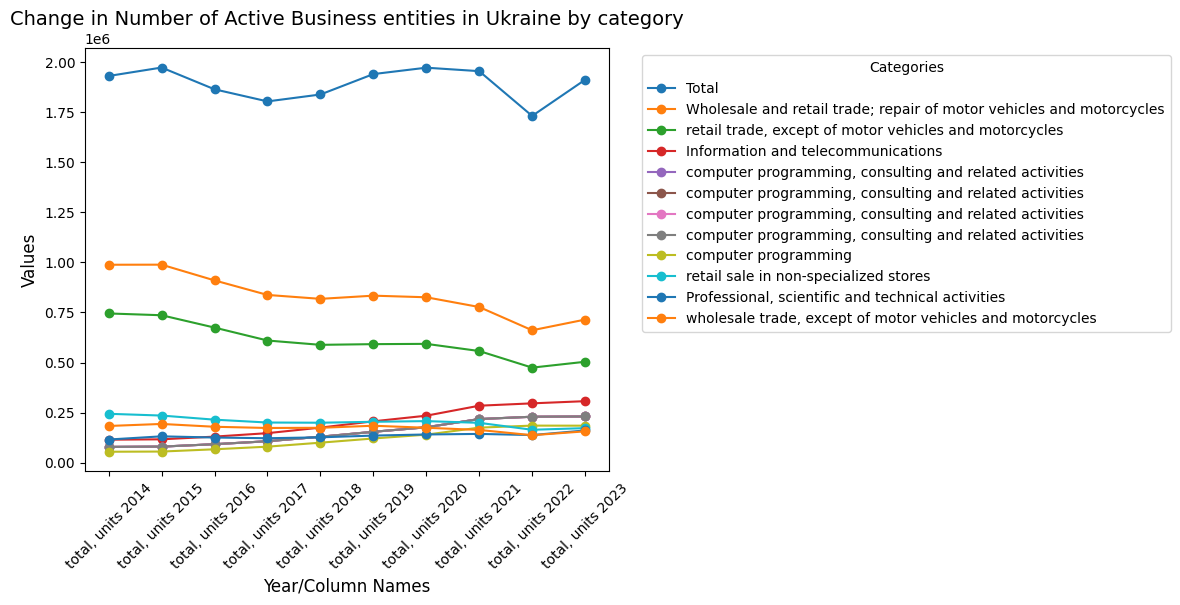

In [13]:
import matplotlib.pyplot as plt

# Extract the columns for plotting (adjusting for zero-based indexing)
plot_data = data_translated.iloc[:, 2:12]  # Columns 3 to 12
categories = data_translated['Category']  # Category names from the first column

# Transpose the data for easier plotting
plot_data = plot_data.T
plot_data.columns = categories

# Plot the data
plt.figure(figsize=(12, 6))
for column in plot_data.columns:
    plt.plot(plot_data.index, plot_data[column], marker='o', label=column)

# Add labels, title, and legend
plt.xticks(rotation=45, fontsize=10)
plt.title('Change in Number of Active Business entities in Ukraine by category', fontsize=14)
plt.xlabel('Year/Column Names', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()

In [14]:
data_unique = data_translated.drop_duplicates(subset='Category', keep='first')
data_unique

,Category,Region,"total, units 2014","total, units 2015","total, units 2016","total, units 2017","total, units 2018","total, units 2019","total, units 2020","total, units 2021","total, units 2022","total, units 2023"
0,Total,Ukraine,1932161.0,1974318.0,1865530.0,1805059.0,1839593.0,1941625.0,1973577.0,1956248.0,1732508.0,1913193.0
515,Wholesale and retail trade; repair of motor ve...,Ukraine,988694.0,989064.0,910413.0,837797.0,818217.0,834159.0,826129.0,777419.0,661158.0,714544.0
584,"retail trade, except of motor vehicles and mot...",Ukraine,745206.0,736287.0,674551.0,609974.0,588379.0,591829.0,593264.0,557446.0,474454.0,503726.0
693,Information and telecommunications,Ukraine,114355.0,116136.0,129704.0,146909.0,174622.0,206147.0,234188.0,284141.0,295912.0,306822.0
726,"computer programming, consulting and related a...",Ukraine,78249.0,79657.0,91782.0,106541.0,129066.0,153746.0,176322.0,217446.0,229022.0,230252.0
728,computer programming,Ukraine,54072.0,55015.0,66308.0,79430.0,99352.0,120313.0,139452.0,174570.0,184658.0,184259.0
585,retail sale in non-specialized stores,Ukraine,243700.0,234900.0,214381.0,200086.0,199090.0,203722.0,207180.0,198549.0,163887.0,172059.0
780,"Professional, scientific and technical activities",Ukraine,115123.0,131035.0,125133.0,121546.0,126100.0,134800.0,140374.0,143210.0,137409.0,160419.0
527,"wholesale trade, except of motor vehicles and ...",Ukraine,182849.0,192990.0,178878.0,172829.0,173731.0,184043.0,173906.0,163035.0,136716.0,155989.0


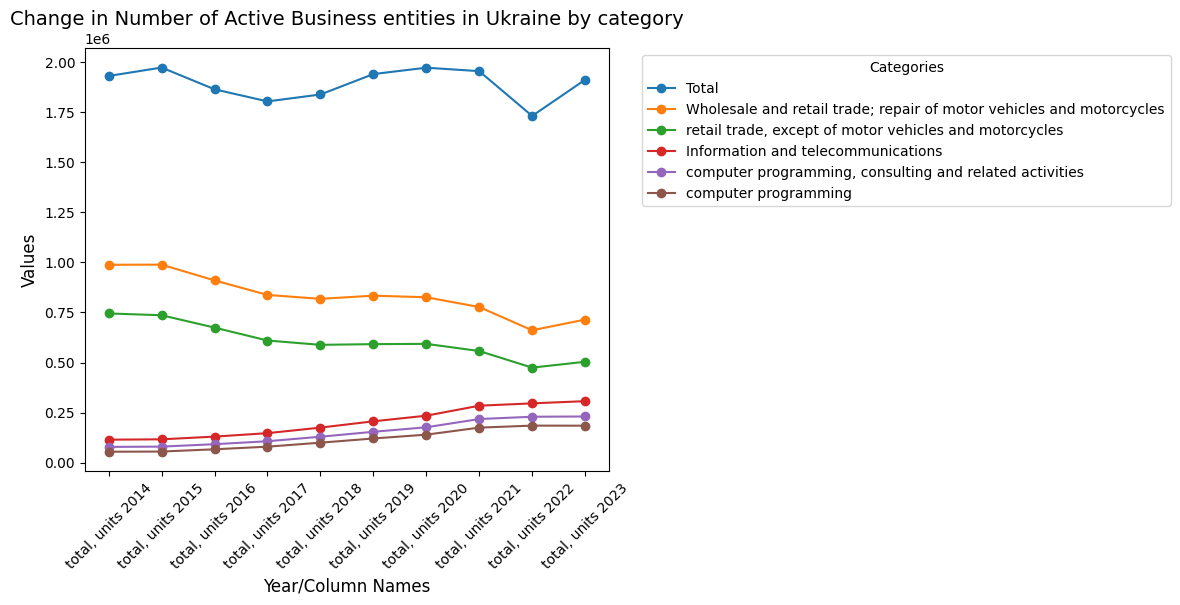

In [15]:
# Extract the columns for plotting (adjusting for zero-based indexing)
data = data_unique.head(6)
plot_data = data.iloc[:, 2:12]  # Columns 3 to 12
categories = data['Category']  # Category names from the first column

# Transpose the data for easier plotting
plot_data = plot_data.T
plot_data.columns = categories

# Plot the data
plt.figure(figsize=(12, 6))
for column in plot_data.columns:
    plt.plot(plot_data.index, plot_data[column], marker='o', label=column)

# Add labels, title, and legend
plt.xticks(rotation=45, fontsize=10)
plt.title('Change in Number of Active Business entities in Ukraine by category', fontsize=14)
plt.xlabel('Year/Column Names', fontsize=12)
plt.ylabel('Values', fontsize=12)
plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the plot
plt.tight_layout()
plt.show()